In [11]:
import dice_ml
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [12]:
X, y = make_moons(
    n_samples=100, noise=0.2, random_state=42
)  # You can adjust the parameters as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Target"] = y
df

,Feature1,Feature2,Target
0,1.645654,-0.536487,1
1,0.113649,0.569574,1
2,0.757790,-0.339259,1
3,-1.146562,0.231257,0
4,-0.655267,0.090329,0
...,...,...,...
95,0.177147,-0.195354,1
96,1.096075,-0.561716,1
97,0.476951,0.666176,0
98,1.873825,-0.092585,1


In [13]:
clf = SVC(gamma=1, probability=True)
clf = clf.fit(X_train, y_train)
print(" ### Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

 ### Accuracy: 0.9333333333333333


In [14]:
data = dice_ml.Data(
    dataframe=df, continuous_features=["Feature1", "Feature2"], outcome_name="Target"
)
model = dice_ml.Model(model=clf, backend="sklearn")

In [15]:
explainer = dice_ml.Dice(data, model, method="random")

In [16]:
X_test[0:20]

array([[-0.97130023,  0.4427774 ],
       [ 0.23619118,  0.89304615],
       [ 0.75778982, -0.33925892],
       [ 1.39332049, -0.11720914],
       [-0.02284354, -0.09658796],
       [ 1.38425793, -0.29899479],
       [ 1.15463488, -0.31605304],
       [-0.93066564,  0.07419618],
       [ 0.81422084,  0.70377605],
       [ 0.17714748, -0.19535399],
       [-0.59821541,  0.74256985],
       [ 1.66277215, -0.13653911],
       [ 2.07607826, -0.03114839],
       [-0.67480213,  0.93993138],
       [ 1.4107341 , -0.45469221],
       [ 0.97879136,  0.84922577],
       [ 0.07396121,  0.73311427],
       [ 0.39264481,  0.15026426],
       [-0.1549164 ,  1.36984215],
       [ 0.89497257,  0.745335  ]])

In [17]:
warnings.simplefilter("ignore")
counterfactuals = explainer.generate_counterfactuals(
    query_instances=df.loc[0:1, ["Feature1", "Feature2"]],
    total_CFs=4,
    desired_class="opposite",
    proximity_weight=0.5,
    diversity_weight=1.0,
    features_to_vary="all",
    permitted_range=None,
    posthoc_sparsity_param=0.1,
)

100%|██████████| 2/2 [00:00<00:00, 13.05it/s]


In [18]:
counterfactuals.visualize_as_dataframe()

Query instance (original outcome : 1)


,Feature1,Feature2,Target
0,1.645654,-0.536487,1



Diverse Counterfactual set (new outcome: 0.0)


,Feature1,Feature2,Target
0,1.321500,0.175529,0
1,1.645654,1.338490,0
2,-0.915586,0.413891,0
3,1.270001,0.828170,0


Query instance (original outcome : 0)


,Feature1,Feature2,Target
0,0.113649,0.569574,0



Diverse Counterfactual set (new outcome: 1.0)


,Feature1,Feature2,Target
0,1.772769,0.569574,1
1,0.113649,-0.312150,1
2,0.113649,-0.013927,1
3,2.490903,0.569574,1


 ### Accuracy: 1.0


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:18<00:00,  9.21s/it]


 ### Accuracy: 1.0


100%|██████████| 2/2 [00:00<00:00, 12.90it/s]


 ### Accuracy: 0.9666666666666667


100%|██████████| 2/2 [00:24<00:00, 12.08s/it]


 ### Accuracy: 0.9333333333333333


100%|██████████| 2/2 [00:21<00:00, 10.87s/it]


 ### Accuracy: 0.9


100%|██████████| 2/2 [00:00<00:00, 13.44it/s]


 ### Accuracy: 0.9666666666666667


100%|██████████| 2/2 [00:00<00:00, 10.88it/s]


 ### Accuracy: 0.9333333333333333


100%|██████████| 2/2 [00:00<00:00, 10.47it/s]


 ### Accuracy: 0.9333333333333333


100%|██████████| 2/2 [00:00<00:00,  7.54it/s]


 ### Accuracy: 0.9333333333333333


100%|██████████| 2/2 [00:00<00:00, 12.88it/s]


 ### Accuracy: 0.9


100%|██████████| 2/2 [00:00<00:00, 10.66it/s]


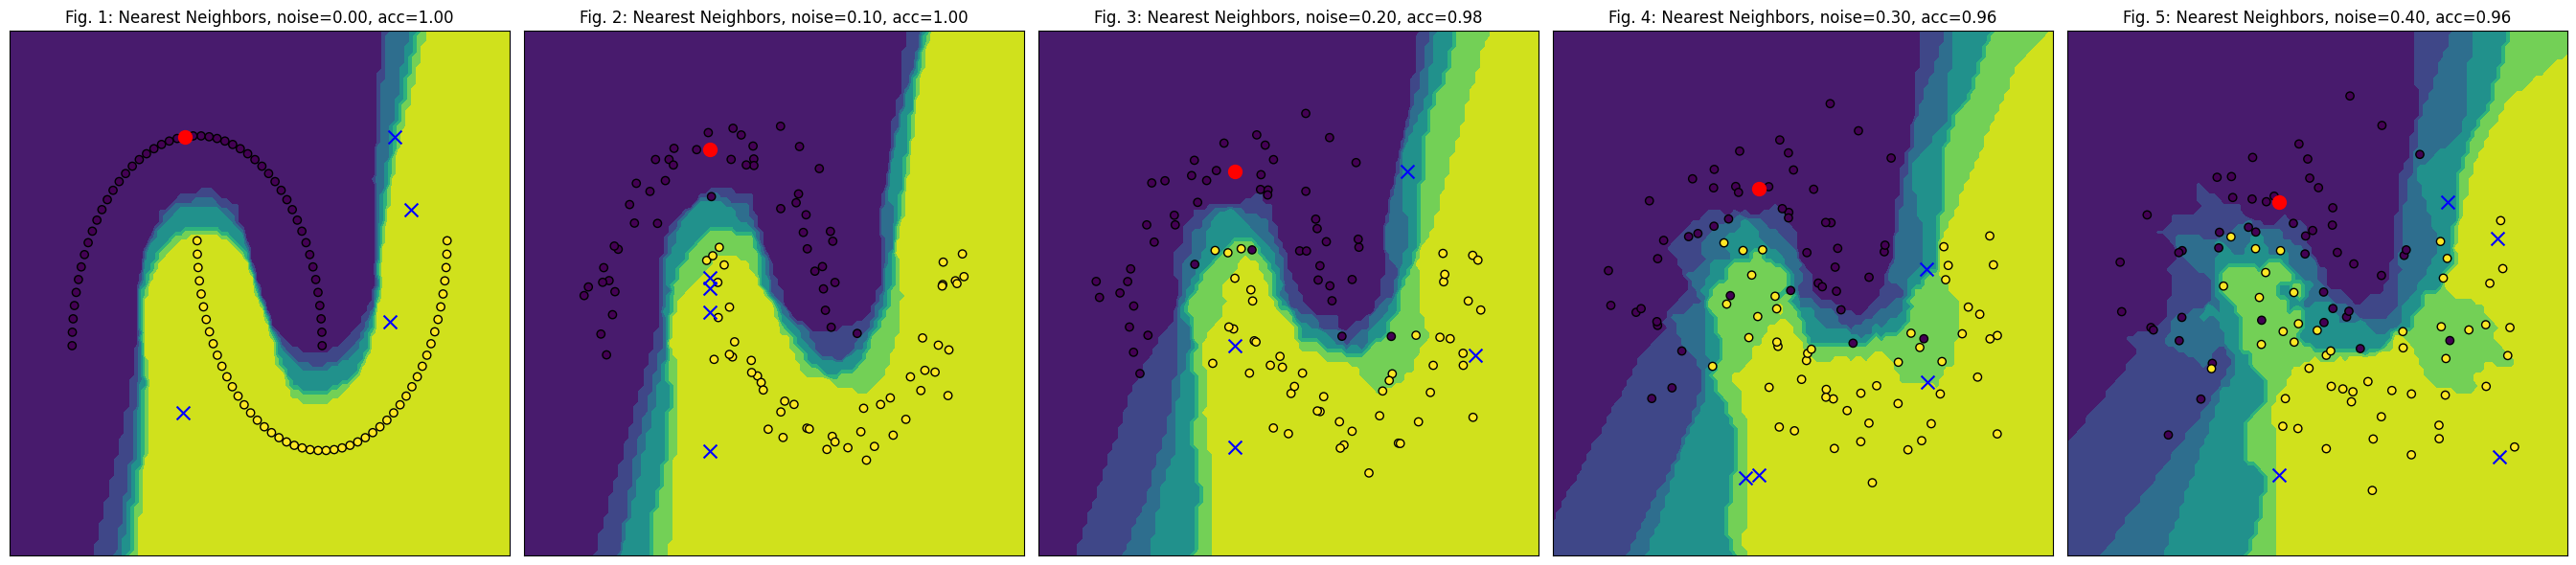

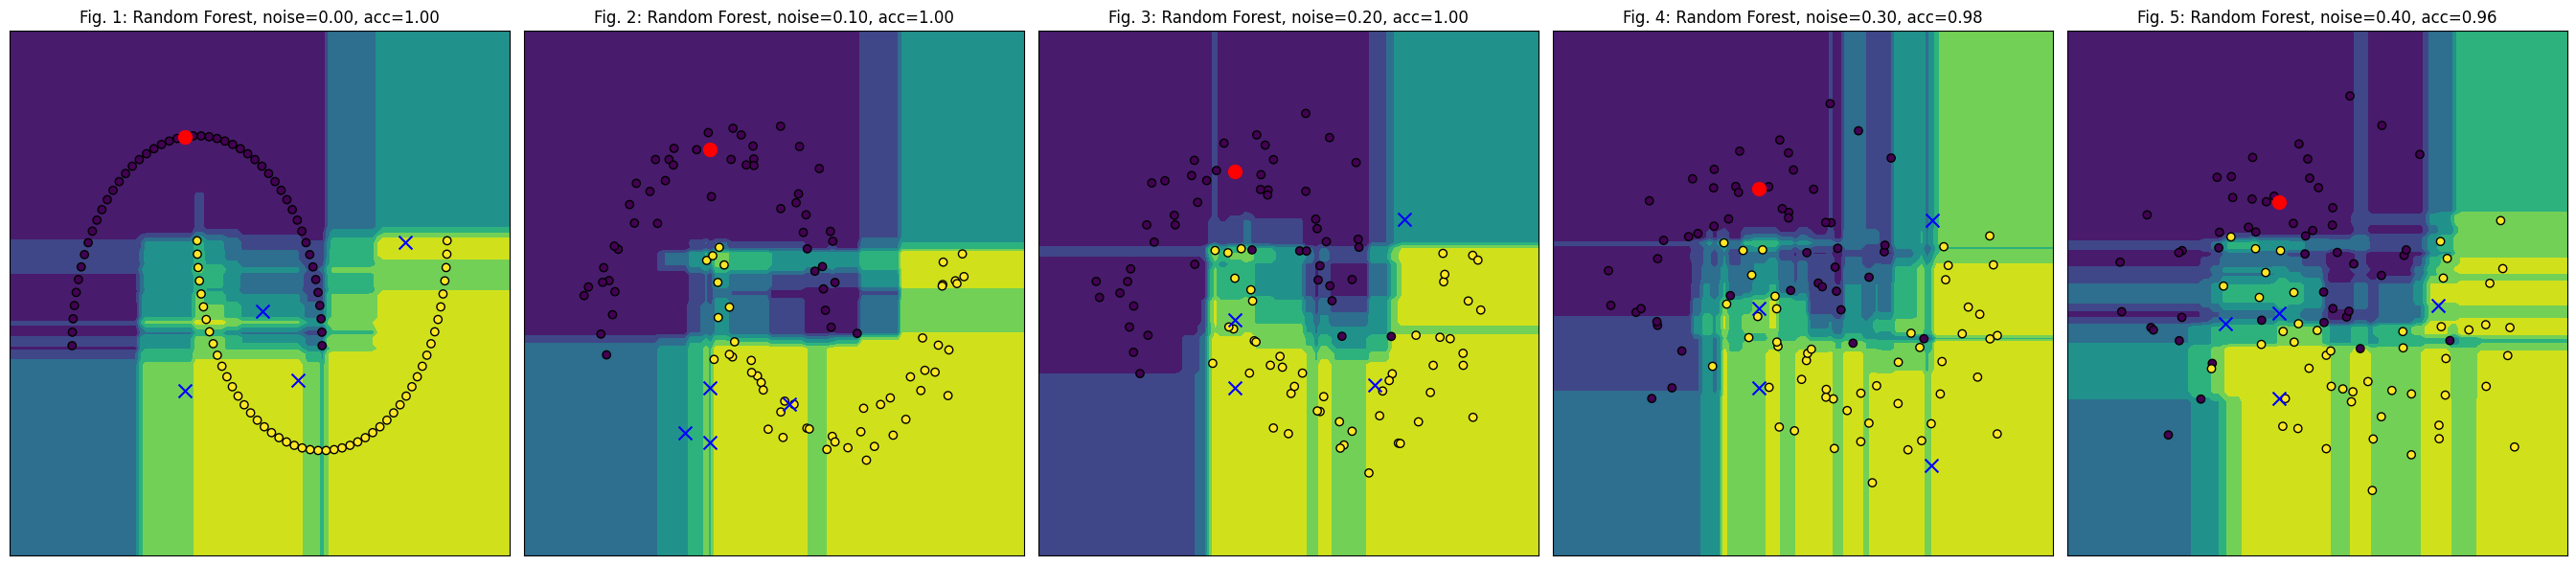

In [19]:
def visualize(X, y, clf, backend, n=10, eta=2, n_gs=100, ax=None, ):
    def plot_boundaries(X, y, ax, clf):
        """ "Plot the data and the decision boundary resulting from a classifier."""
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5)
        # Plot the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
    df["Target"] = y

    clf = clf.fit(X_train, y_train)
    print(" ### Accuracy:", accuracy_score(y_test, clf.predict(X_test)))

    
    data = dice_ml.Data(dataframe=df, continuous_features=["Feature1", "Feature2"], outcome_name="Target")
    model = dice_ml.Model(model=clf, backend=backend)
    if backend == 'sklearn':
        explainer = dice_ml.Dice(data, model, method="random")
    else:
        explainer = dice_ml.Dice(data, model)
    
    warnings.simplefilter("ignore")
    counterfactuals = explainer.generate_counterfactuals(
        query_instances=df.loc[0:1, ["Feature1", "Feature2"]],
        total_CFs=4,
        desired_class="opposite", 
        proximity_weight=0.5,
        diversity_weight=1.0,
        features_to_vary="all",
        permitted_range=None,
        posthoc_sparsity_param=0.1
    )

    if not ax:
        _, ax = plt.subplots()
    plot_boundaries(X, y, ax, clf)
    ax.scatter(df.loc[0, ["Feature1"]], df.loc[0, 'Feature2'], c="red", marker="o", label="Obs", s=100)
    enemy_df = counterfactuals.cf_examples_list[0].final_cfs_df
    ax.scatter(enemy_df['Feature1'], enemy_df['Feature2'], c="blue", marker="x", s=100)

    return ax


names = [
    "Nearest Neighbors",
    "Random Forest",
    "SVM",
]
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    # SVC(),
]

## Création de jeux de données avec différents niveaux de bruit
datasets = []
noise_lvl = []
for noise in np.arange(0, 0.5, 0.1):
    noise_lvl.append(noise)
    datasets.append(make_moons(noise=noise, random_state=0))

for clf, name in zip(classifiers, names):
    fig = plt.figure(figsize=(27, 6))
    for i, (dataset, noise) in enumerate(zip(datasets, noise_lvl)):
        X, y = dataset
        clf = clf.fit(X, y)
        ax = fig.add_subplot(1, len(datasets), i + 1)
        ax.set_title(
            f"Fig. {i+1}: {name}, noise={noise:.2f}, acc={accuracy_score(y, clf.predict(X)):.2f}"
        )
        visualize(X,y, clf, "sklearn", ax=ax)
    fig.tight_layout()


**Faire varier les paramètre de DICE**

# Pytorch

In [82]:
from typing import Any
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # 2 input features, 16 hidden units
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)  # 1 output unit (binary classification)
        self.sig = nn.Sigmoid()

    def __call__(self, *args: Any, **kwds: Any) -> Any:
        return self.forward(*args, **kwds)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sig(x)
        return x

# Generate synthetic data
X, y = make_moons(
    n_samples=500, noise=0.2, random_state=42
)

df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Target"] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = SimpleNN()
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.005)

num_epochs = 1000

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add a dimension for the output

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training complete')


model.eval()  # Set the model to evaluation mode
test_inputs = torch.tensor(X_test, dtype=torch.float32)
with torch.no_grad():
    test_outputs = model(test_inputs)
    predicted_labels = np.round(test_outputs)

accuracy = (predicted_labels.detach().numpy() == y_test.reshape(-1, 1)).mean()
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch [100/1000], Loss: 0.5925
Epoch [200/1000], Loss: 0.5710
Epoch [300/1000], Loss: 0.5635
Epoch [400/1000], Loss: 0.5581
Epoch [500/1000], Loss: 0.5549
Epoch [600/1000], Loss: 0.5516
Epoch [700/1000], Loss: 0.5451
Epoch [800/1000], Loss: 0.5353
Epoch [900/1000], Loss: 0.5298
Epoch [1000/1000], Loss: 0.5267
Training complete
Test Accuracy: 97.00%


Un fonction qui évalue la validité (prédit dans l'autre classe), proximité, une qui évalue la diversité, 

In [83]:
data = dice_ml.Data(dataframe=df, continuous_features=["Feature1", "Feature2"], outcome_name="Target")
dice_model = dice_ml.Model(model=model, backend="PYT")
explainer = dice_ml.Dice(data, dice_model)

warnings.simplefilter("ignore")
counterfactuals = explainer.generate_counterfactuals(
    query_instances=df.loc[0:1, ["Feature1", "Feature2"]],
    total_CFs=4,
    desired_class="opposite", 
    proximity_weight=0.5,
    diversity_weight=1.0,
    features_to_vary="all",
    permitted_range=None,
    posthoc_sparsity_param=0.1
)


100%|██████████| 2/2 [00:00<00:00, 11.97it/s]


In [84]:
counterfactuals.visualize_as_dataframe()

Query instance (original outcome : 1)


,Feature1,Feature2,Target
0,0.830858,-0.334342,1



Diverse Counterfactual set (new outcome: 0.0)


,Feature1,Feature2,Target
0,-0.007909,0.650430,0
1,0.830858,0.005333,0
2,0.830858,0.484276,0
3,-0.956733,-0.334342,0


Query instance (original outcome : 0)


,Feature1,Feature2,Target
0,0.99171,0.879,0



Diverse Counterfactual set (new outcome: 1.0)


,Feature1,Feature2,Target
0,0.991710,-0.483686,1
1,2.252301,0.193122,1
2,2.095020,1.123377,1
3,-0.109925,-0.770260,1
